### Polynomial Regression

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

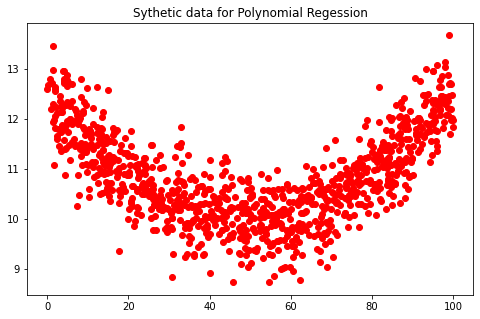

In [2]:
# Sythetic data: Suppose the true mean is f(x) = 0.001(x-50)^2+10 --> f(x) = 0.001x^2 - 0.1x + 12.5

theta_true = np.array([[12.5],[-0.1],[0.001]])

X1 = np.random.uniform(0,100,1000).reshape(-1,1)
X = np.concatenate((np.ones((X1.shape[0],1)),X1),1)
X_expand = np.concatenate((X,X[:,1:]**2),1)

y = X_expand@theta_true + np.random.normal(0,0.5,(X_expand.shape[0],1))

plt.figure(figsize=(8,5))
plt.plot(X[:,1],y,'ro')
plt.title('Sythetic data for Polynomial Regession')
plt.show()

In [3]:
# Split data to traning and validation set
def train_val_split(X,y,train_size):
    m = X.shape[0]
    order = np.arange(m)
    np.random.shuffle(order)
    train_len = int(m*train_size)
    train_in = order[:train_len]
    val_in = order[train_len:]
    X_train = X[train_in,:]
    y_train = y[train_in,:]
    X_val = X[val_in,:]
    y_val = y[val_in,:]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val = train_val_split(X,y,0.8)

- Training data set:

$$\mathcal{X} = 
\begin{bmatrix} 
1 & x_{1}^{1} & x_{1}^{2}& .. & x_{1}^{n} \\ 
1 &x_{2}^{1} & x_{2}^{2}& .. & x_{2}^{n} \\ 
: & : & : & .. & : \\
1 & x_{m}^{1} & x_{m}^{2}& .. & x_{m}^{n} \\
\end{bmatrix};
\mathcal{Y} = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
: \\
y_{m} \\
\end{bmatrix} 
$$

- Structure of model (*for a single input $x$)*:

$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i = \theta^{T}\bf{X'}$$

Polynomial regression with $d=2$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$

$$\bf{x} = \begin{bmatrix} 1 \\ x \\ x^2 \end{bmatrix};  \bf{\theta} = \begin{bmatrix} \theta_{0} \\ \theta_{1} \\ \theta_{2} \end{bmatrix}$$

- Cost function:
$$\mathcal{J}(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left( h_\theta(x^{(i)}) - y^{(i)} \right)^{2}$$

- Optimal solution:
$$\theta^* = \arg\min_{\theta} \mathcal{J}(\theta) = (\bf{X'}^{T}\bf{X'})^{-1}\bf{X'}y$$

In [4]:
# Training and Validation set
X_exp1 = X_train
X_exp2 = np.concatenate((X_train,X_train[:,1:]**2),1)
X_exp3 = np.concatenate((X_train,X_train[:,1:]**2,X_train[:,1:]**3),1)
train_set = list([X_exp1,X_exp2,X_exp3])

X_exp1 = X_val
X_exp2 = np.concatenate((X_val,X_val[:,1:]**2),1)
X_exp3 = np.concatenate((X_val,X_val[:,1:]**2,X_val[:,1:]**3),1)
val_set = list([X_exp1,X_exp2,X_exp3])

# Build the model using trainning set
theta_star = []
for x_train in train_set:
    theta_star.append(np.linalg.inv(x_train.T@x_train)@x_train.T@y_train)
    
# Calculate training cost
J_train = []
for degree in range(3):
    J_train.append(((train_set[degree]@theta_star[degree] - y_train)**2).mean())
    
# Calulate validation cost
J_val = []
for degree in range(3):
    J_val.append(((val_set[degree]@theta_star[degree] - y_val)**2).mean())

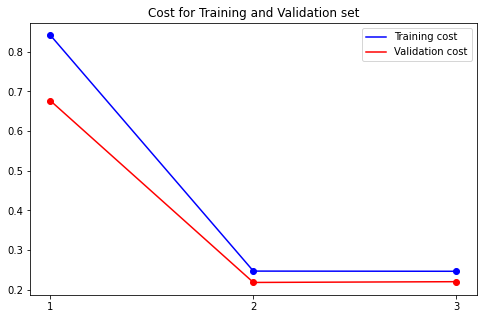

In [5]:
# Plot Cost for Training and Validation set
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,4,1),J_train,'b-',label='Training cost')
plt.plot(np.arange(1,4,1),J_train,'bo')
plt.plot(np.arange(1,4,1),J_val,'r-',label='Validation cost')
plt.plot(np.arange(1,4,1),J_val,'ro')

plt.xticks(np.arange(1,4,1),np.arange(1,4,1))
plt.title('Cost for Training and Validation set')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
mse_err = []
for degree in range(3):
    mse_err.append(mean_squared_error(val_set[degree]@theta_star[degree],y_val))

In [7]:
mse_err

[0.6764135067722301, 0.21811126417277202, 0.2200312327206845]

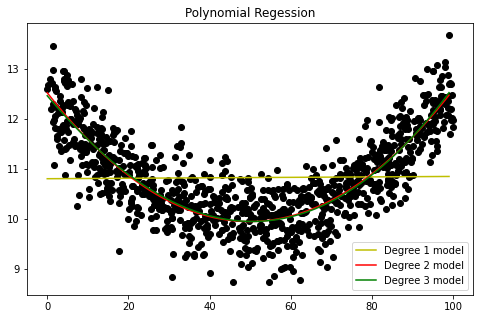

In [8]:
# Plot result
plt.figure(figsize=(8,5))
plt.plot(X[:,1],y,'ko')
plt.title('Polynomial Regession')

x_plot = np.arange(0,100,1).reshape(-1,1)
# Degree 1
y_plot = np.concatenate((np.ones((x_plot.shape[0],1)),x_plot),1)@theta_star[0] 
plt.plot(x_plot,y_plot,'y-',label='Degree 1 model')

# Degree 2
y_plot = np.concatenate((np.ones((x_plot.shape[0],1)),x_plot,x_plot**2),1)@theta_star[1] 
plt.plot(x_plot,y_plot,'r-',label='Degree 2 model')

# Degree 3
y_plot = np.concatenate((np.ones((x_plot.shape[0],1)),x_plot,x_plot**2,x_plot**3),1)@theta_star[2] 
plt.plot(x_plot,y_plot,'g-',label='Degree 3 model')

plt.legend()
plt.show()